In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==0.21.1

  Using cached scikit-learn-0.21.1.tar.gz (12.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [141 lines of output]
      C:\Users\93153\AppData\Local\Temp\pip-install-12hrd3r3\scikit-learn_c1a7a70d807d43d69f2386517b4c1689\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import parse_version
      Partial import of sklearn during the build process.
      C:\Users\93153\AppData\Local\Temp\pip-install-12hrd3r3\scikit-learn_c1a7a70d807d43d69f2386517b4c1689\setup.py:122: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdo

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def draw(data_prob, class_labels: tuple, num_classes: int):
    plt.clf()  # Clear the previous figure to prevent memory consumption with large data volumes
    # Data
    angles = np.linspace(0, 2 * np.pi, num_classes, endpoint=False)
    # Close the loop if needed
    # data = np.concatenate((data_prob, [data_prob[0]]))
    # angles = np.concatenate((angles, [angles[0]]))
    fig = plt.figure(1)
    fig.patch.set_facecolor('skyblue')  # Set the background color of the figure to sky blue
    print("Length of angles:", len(angles))
    # Parameters for polar coordinate
    ax = fig.add_subplot(111, polar=True)
    ax.patch.set_facecolor('skyblue')  # Set the background color of the axes to sky blue
    ax.plot(angles, data_prob, 'bo-', linewidth=2)
    ax.fill(angles, data_prob, facecolor='r', alpha=0.25)
    ax.set_thetagrids(
        angles * 180 / np.pi, class_labels, fontproperties="SimHei")
    ax.set_title("Emotion Recognition", va='bottom', fontproperties="SimHei")
    # Set the data range for the radar chart here
    ax.set_rlim(0, 1)
    ax.grid(True)
    plt.pause(1)  # Pause time

plt.ion()  # Turn on interactive mode
plt.ioff()  # Close the plotting window
plt.show()



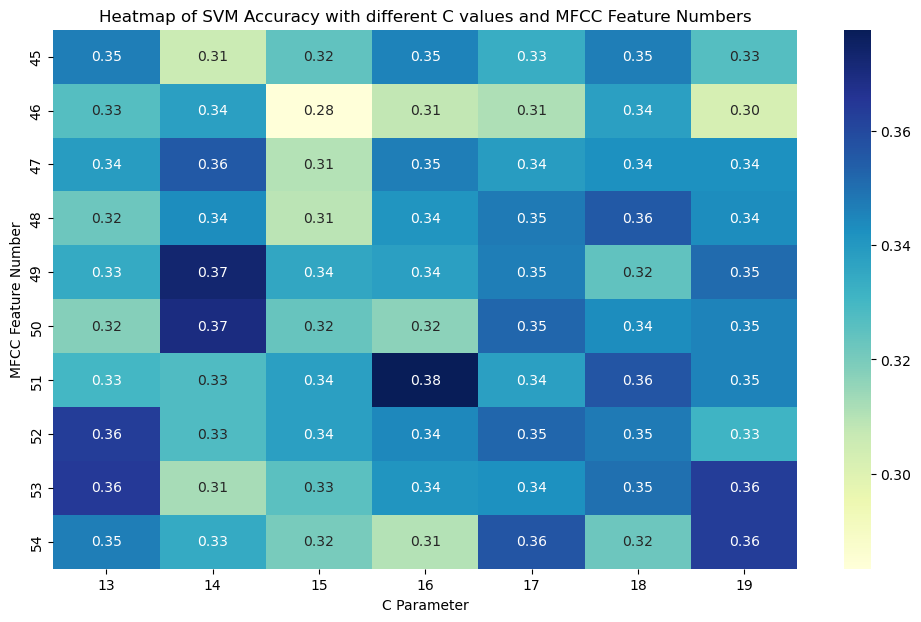

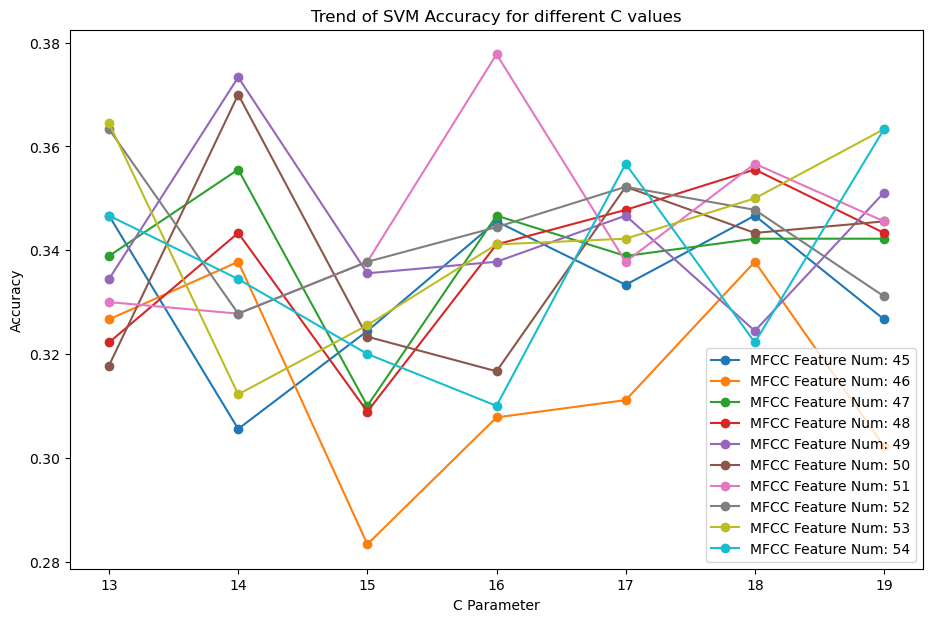

Length of features: 49
[4]
[[0.04982126 0.0872621  0.23823553 0.36620655 0.23378333 0.02469122]]
Length of model prediction: 6
Length of angles: 6


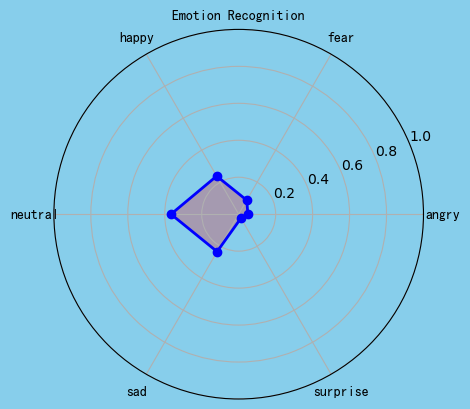

Length of features: 49
[2]
[[0.15813607 0.29291793 0.07234743 0.06673775 0.09362848 0.31623234]]
Length of model prediction: 6
Length of angles: 6


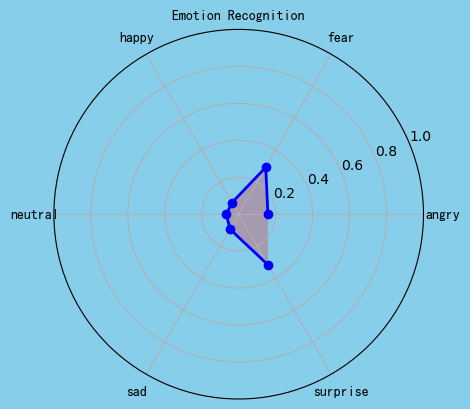

Length of features: 49
[1]
[[0.42063753 0.11231864 0.07822607 0.01847915 0.10011914 0.27021947]]
Length of model prediction: 6
Length of angles: 6


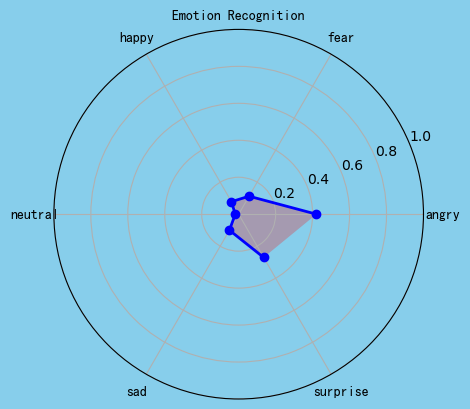

Length of features: 49
[5]
[[0.06235155 0.17612298 0.28231286 0.07038054 0.26634565 0.14248643]]
Length of model prediction: 6
Length of angles: 6


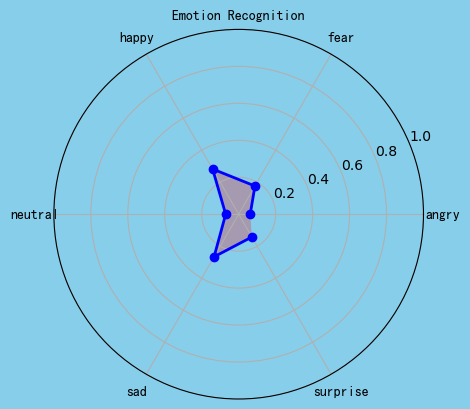

Length of features: 49
[1]
[[0.20436931 0.06593488 0.14348728 0.27702594 0.22232029 0.0868623 ]]
Length of model prediction: 6
Length of angles: 6


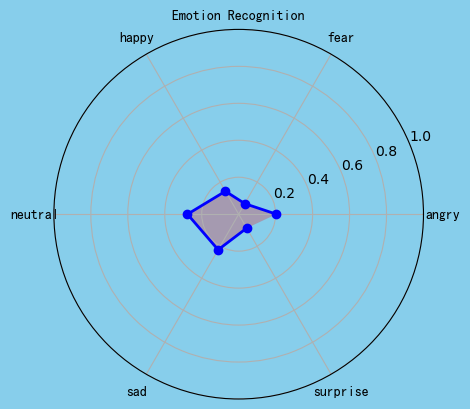

Length of features: 49
[2]
[[0.07742515 0.36381618 0.09627602 0.17208872 0.09487926 0.19551466]]
Length of model prediction: 6
Length of angles: 6


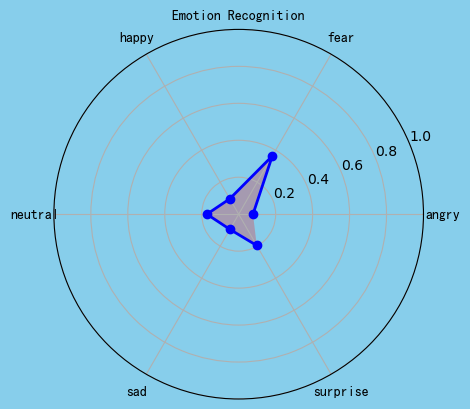

Length of features: 49
[4]
[[0.05204042 0.2138078  0.15885843 0.37993945 0.11243188 0.08292202]]
Length of model prediction: 6
Length of angles: 6


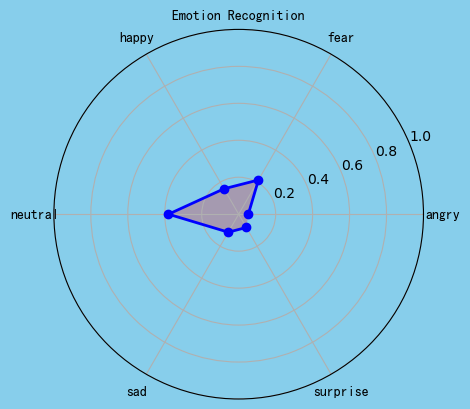

Length of features: 49
[4]
[[0.03434043 0.05975692 0.22170082 0.42939972 0.238759   0.01604311]]
Length of model prediction: 6
Length of angles: 6


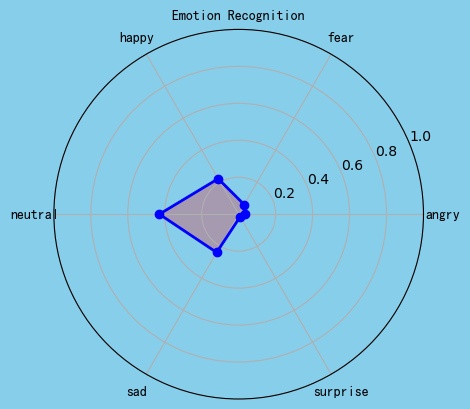

KeyboardInterrupt: 

In [5]:
import os
from random import shuffle
from train import getFeature
import joblib
import numpy as np
import pyaudio
import wave

path = r'casia'

wav_paths = []

person_dirs = os.listdir(path)
for person in person_dirs:
    if person.endswith('txt'):
        continue
    emotion_dir_path = os.path.join(path, person)
    emotion_dirs = os.listdir(emotion_dir_path)
    for emotion_dir in emotion_dirs:
        if emotion_dir.endswith('.ini'):
            continue
        emotion_file_path = os.path.join(emotion_dir_path, emotion_dir)
        emotion_files = os.listdir(emotion_file_path)
        for file in emotion_files:
            if not file.endswith('wav'):
                continue
            wav_path = os.path.join(emotion_file_path, file)
            wav_paths.append(wav_path)


shuffle(wav_paths)

model = joblib.load("Models\C_19_mfccNum_46.m")

p = pyaudio.PyAudio()
for wav_path in wav_paths:
    f = wave.open(wav_path, 'rb')
    stream = p.open(
        format=p.get_format_from_width(f.getsampwidth()),
        channels=f.getnchannels(),
        rate=f.getframerate(),
        output=True)
    data = f.readframes(f.getparams()[3])
    stream.write(data)
    stream.stop_stream()
    stream.close()
    f.close()
    data_feature = getFeature(wav_path, 46)
    print("Length of features:", len(data_feature))
    print(model.predict([data_feature]))
    print(model.predict_proba([data_feature]))
    proba = model.predict_proba([data_feature])[0]
    print("Length of model prediction:", len(proba))
    labels = np.array(['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

    draw(model.predict_proba([data_feature])[0], labels, 6)

p.terminate()